In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Generation of synthetic data

In [2]:
df = pd.read_csv('signal.txt',header=None)

In [3]:
x = np.asarray(df)

(50, 200)


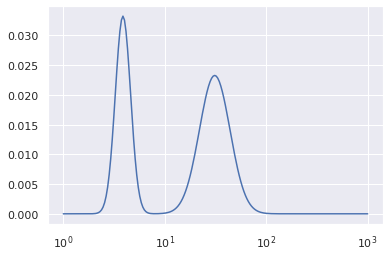

In [4]:
def exp_T(n, Tmin, Tmax, N):
    return Tmin * np.exp(- (n - 1) * np.log( Tmin / Tmax ) / (N - 1)) 

def reg_T(m, tmin, tmax, M):
    return tmin + (tmax - tmin) * (m-1)/ (M - 1) 

N = 200
n = np.arange(N)+1
T_n_exp = exp_T(n, 1, 1000, N)

fg, ax  = plt.subplots(1,1)
ax.set_xscale('log')
ax.plot(T_n_exp, x)

M = 50
m = np.arange(M)+1
T_n_reg = reg_T(m, 0, 1.5, M)

K = np.exp(-T_n_reg.reshape(-1,1) @ T_n_exp.reshape(-1,1).T)
print(K.shape)

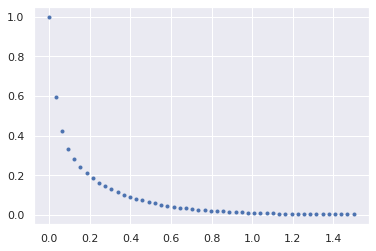

In [5]:
z = K @ x
#sigma_2 = (1e-4 * z  * z.T * np.eye(M))
sigma_2 = np.square(1e-2 * z[0]) * np.eye(M)
w = np.random.normal(loc = 0, scale=np.diag(sigma_2))
y = z.reshape(-1,) + w

fg, ax  = plt.subplots(1,1)
ax.plot(T_n_reg, y, linestyle='',marker='.')

## Maximum Entropy Regularization

### Question 1 
### Question 2 
### Question 3 


### Question 4 
#### proximal operators

In [6]:
from  scipy.special import  lambertw

In [82]:
def prox_g(u, gamma=1):
    ''' 
    return the prox_{gamma * ent}(x)
    '''
#     print(lambertw(np.exp(u / gamma - 1 - np.log(gamma))))
    return(np.real(gamma * lambertw(np.exp(u / gamma - 1 - np.log(gamma)))))

def prox_f(x, K, y): 
    ''' 
    return the prox_{||K . -y ||^2}(x)
    '''
    return np.linalg.inv(K.T @ K + np.eye(K.shape[1])) @ (x + K.T @ y)

#### Forward Backward Algorithm

In [ ]:
np.eye(K.shape[1]).shape
(K.T @ K).shape

In [32]:
beta = 1e-2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0.5, 1.0, 'Reconstruction result, Smoothness prior, beta=0, normalized_error=0')

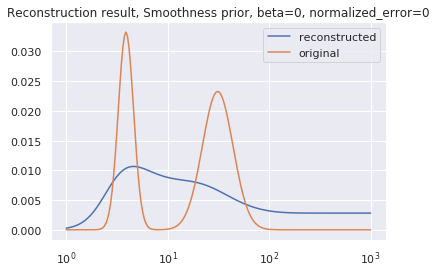

In [83]:
eps = 1e-6
converged = False 
beta = 1e-2
lambda_ = 1/2
nu = np.max(abs(np.linalg.eigvals(K.T @ K)))
gamma = 1/ nu 
x_n = np.zeros(x.shape)
while not converged : 
    y_n = x_n - gamma * ( K.T @ K @ x_n - K.T @ y.reshape(-1,1))

    x_n_ = x_n + lambda_ * (prox_g(y_n, gamma = gamma * beta) - x_n)
    if np.isinf(x_n_).any():
        raise ValueError
    err = np.linalg.norm(x_n_ - x_n) / np.linalg.norm(x_n)
    if np.linalg.norm(x_n_ - x_n) < np.linalg.norm(x_n) * eps : 
        converged = True
    x_n = x_n_
fg, ax = plt.subplots(1,1)
ax.set_xscale('log')
ax.plot(T_n_exp, x_n, label='reconstructed')
ax.plot(T_n_exp, x, label='original')
ax.legend()
ax.set_title('Reconstruction result, Smoothness prior, beta={0}, normalized_error={1}'.format(0, 0))

The use of the exp make the implementation is numerically instable which does not allow to reduce the beta parameters to smaller value

#### Douglas-Rachford Algorithm 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Reconstruction result, Smoothness prior, beta=0.001, normalized_error=0')

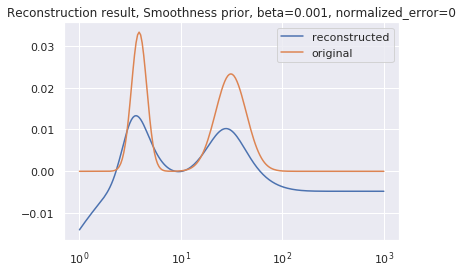

In [87]:
eps = 1e-6
converged = False 
beta = 0.000159
beta = 1e-3
lambda_ = 1/2
nu = np.max(abs(np.linalg.eigvals(K.T @ K)))
gamma = 2/ (1.001 * nu) 
gamma = 1
x_n = np.random.random(x.shape)
x_n = np.zeros(x.shape)
while not converged : 
    y_n = prox_g(x_n, gamma = beta)
    z_n = prox_f(2 * y_n - x_n, K, y.reshape(-1,1)) 
    x_n_ = x_n + lambda_ * (z_n - y_n)
    err = np.linalg.norm(x_n_ - x_n) / np.linalg.norm(x_n) 
    if err < eps : 
        converged = True
    x_n = x_n_ 
    
fg, ax = plt.subplots(1,1)
ax.set_xscale('log')
ax.plot(T_n_exp, x_n, label='reconstructed')
ax.plot(T_n_exp, x, label='original')
ax.legend()
ax.set_title('Reconstruction result, Smoothness prior, beta={0}, normalized_error={1}'.format(beta, 0))